# Fashion Classification
Introduction in the problems

# Tensorflow and Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

In [3]:
from PIL import Image

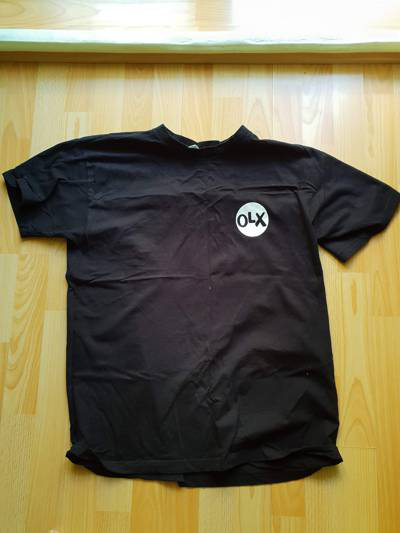

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

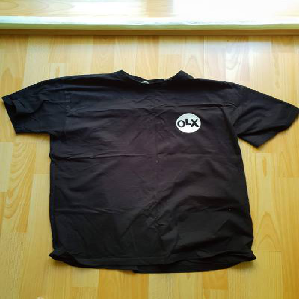

In [5]:
load_img(fullname, target_size=(299,299))

In [6]:
img = load_img(fullname, target_size=(299,299))

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x18145C99BB0>


In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
x[1]

array([[188, 179, 110],
       [187, 178, 109],
       [186, 177, 108],
       [185, 176, 107],
       [186, 177, 108],
       [186, 177, 108],
       [186, 177, 108],
       [187, 178, 109],
       [188, 179, 110],
       [191, 182, 113],
       [196, 187, 118],
       [197, 188, 119],
       [191, 183, 120],
       [198, 190, 127],
       [202, 194, 132],
       [205, 196, 137],
       [202, 195, 140],
       [202, 195, 141],
       [202, 196, 144],
       [203, 197, 149],
       [202, 198, 151],
       [203, 199, 154],
       [205, 200, 158],
       [205, 200, 158],
       [199, 200, 158],
       [199, 201, 161],
       [200, 202, 162],
       [200, 202, 163],
       [200, 204, 167],
       [200, 204, 169],
       [199, 203, 168],
       [199, 204, 172],
       [201, 206, 174],
       [201, 208, 177],
       [204, 210, 182],
       [204, 210, 182],
       [202, 210, 186],
       [200, 208, 185],
       [200, 208, 185],
       [202, 210, 189],
       [210, 217, 199],
       [212, 219

# Pre-Trained Convolutional Neural Networks

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

In [12]:
X = np.array([x]) # The model accepts batch of image, need to set it an array

In [13]:
X = preprocess_input(X) # converted -1 to 1 from 0 to 255

In [14]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [15]:
pred =  model.predict(X)

1/1 [==============================] - 1s 696ms/step


In [16]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.039600264),
  ('n04370456', 'sweatshirt', 0.03529962),
  ('n03710637', 'maillot', 0.010884134),
  ('n04525038', 'velvet', 0.0018057615)]]

# Convolutional Neural Networks
Explaining CNN theory, notes are in the gdocx

# Transfer Learning

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/', target_size=(150,150), batch_size=32)

Found 3068 images belonging to 10 classes.


In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
next(train_ds)

(array([[[[-0.4588235 , -0.58431375, -0.8666667 ],
          [-0.4823529 , -0.60784316, -0.8901961 ],
          [-0.4588235 , -0.58431375, -0.8666667 ],
          ...,
          [-0.64705884, -0.69411767, -0.8980392 ],
          [-0.654902  , -0.7019608 , -0.90588236],
          [-0.6862745 , -0.73333335, -0.9372549 ]],
 
         [[-0.45098037, -0.5764706 , -0.85882354],
          [-0.5058824 , -0.6313726 , -0.9137255 ],
          [-0.4823529 , -0.60784316, -0.8901961 ],
          ...,
          [-0.64705884, -0.69411767, -0.8980392 ],
          [-0.67058825, -0.7176471 , -0.92156863],
          [-0.6784314 , -0.7254902 , -0.92941177]],
 
         [[-0.4352941 , -0.56078434, -0.84313726],
          [-0.49019605, -0.6156863 , -0.8980392 ],
          [-0.46666664, -0.5921569 , -0.8745098 ],
          ...,
          [-0.67058825, -0.7176471 , -0.92156863],
          [-0.62352943, -0.67058825, -0.8745098 ],
          [-0.6627451 , -0.70980394, -0.9137255 ]],
 
         ...,
 
         [[ 

In [21]:
X, y = next(train_ds)

In [22]:
X.shape , y.shape

((32, 150, 150, 3), (32, 10))

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/', target_size=(150,150), batch_size=32, shuffle=False)

Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
 )

base_model.trainable = False # Don't change the convolution layers

In [24]:
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
vectors = pooling(base)
# vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors) # To make a prediction 

model = keras.Model(inputs, outputs)

In [25]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [26]:
preds.shape

(32, 10)

In [27]:
preds[0] # random things, because we haven't train the model yet. Use optimizer to adjust the weights

array([ 1.02857   , -0.58582556,  0.35533226,  0.00595468,  0.04276001,
        0.0177125 , -0.44674337,  0.24201779,  0.73947006,  0.1770553 ],
      dtype=float32)

In [28]:
learning_rate = 0.01

# To know the best weights we need to use loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

# to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)



In [29]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [30]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 67s 676ms/step - loss: 1.2234 - accuracy: 0.6806 - val_loss: 0.7783 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 58s 602ms/step - loss: 0.6140 - accuracy: 0.8165 - val_loss: 0.8733 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 59s 611ms/step - loss: 0.3722 - accuracy: 0.8771 - val_loss: 1.0246 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 59s 619ms/step - loss: 0.2218 - accuracy: 0.9208 - val_loss: 1.0854 - val_accuracy: 0.7595
Epoch 5/10
96/96 [==============================] - 61s 639ms/step - loss: 0.1487 - accuracy: 0.9475 - val_loss: 0.9255 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 60s 627ms/step - loss: 0.0923 - accuracy: 0.9694 - val_loss: 0.8688 - val_accuracy: 0.8270
Epoch 7/10
96/96 [==============================] - 64s 663ms/step - loss: 0.0706 - accuracy: 0.9762 - val_loss: 1.0013 - val_accuracy: 0.7977

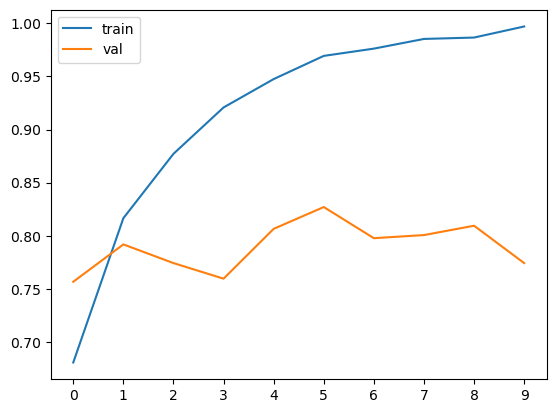

In [31]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# Adjusting the Learning Rate

In [23]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable = False # Don't change the convolution layers

    ####################################################################### CREATE ARCHITECTURE
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
    vectors = pooling(base)

    outputs = keras.layers.Dense(10)(vectors) # To make a prediction 

    model = keras.Model(inputs, outputs)
    ####################################################################### END OF ARCHITIECTURE
    
    # To know the best weights we need to use loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

    # to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model



In [34]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

Epoch 1/10
96/96 [==============================] - 58s 584ms/step - loss: 1.8747 - accuracy: 0.3585 - val_loss: 1.5317 - val_accuracy: 0.5220
Epoch 2/10
96/96 [==============================] - 51s 527ms/step - loss: 1.3563 - accuracy: 0.5658 - val_loss: 1.1999 - val_accuracy: 0.6510
Epoch 3/10
96/96 [==============================] - 51s 531ms/step - loss: 1.1217 - accuracy: 0.6470 - val_loss: 1.0258 - val_accuracy: 0.7009
Epoch 4/10
96/96 [==============================] - 52s 545ms/step - loss: 0.9848 - accuracy: 0.6910 - val_loss: 0.9185 - val_accuracy: 0.7390
Epoch 5/10
96/96 [==============================] - 53s 554ms/step - loss: 0.8933 - accuracy: 0.7177 - val_loss: 0.8478 - val_accuracy: 0.7625
Epoch 6/10
96/96 [==============================] - 53s 551ms/step - loss: 0.8273 - accuracy: 0.7363 - val_loss: 0.7994 - val_accuracy: 0.7742
Epoch 7/10
96/96 [==============================] - 53s 551ms/step - loss: 0.7753 - accuracy: 0.7507 - val_loss: 0.7615 - val_accuracy: 0.7889

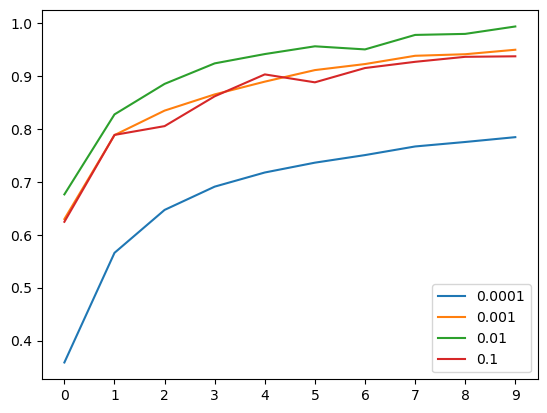

In [35]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

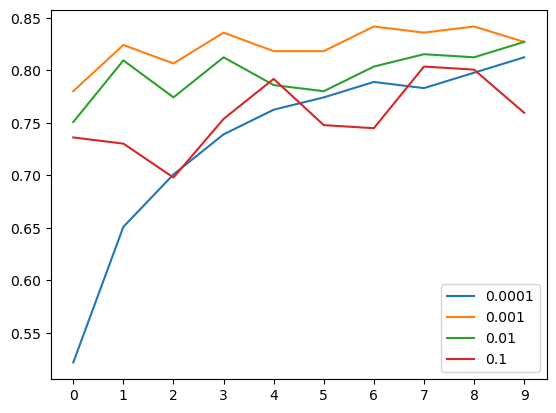

In [36]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

In [37]:
del scores[0.1]
del scores[0.0001]

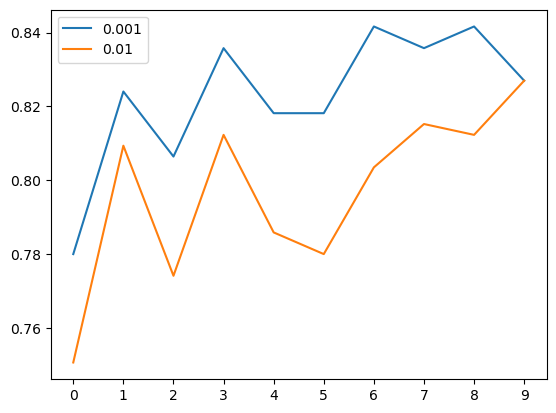

In [38]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

In [24]:
learning_rate = 0.001 # The best learning rate

# CheckPoint

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [25]:
checkpoint=keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy')

In [26]:
learning_rate=0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data = val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 76s 748ms/step - loss: 1.1203 - accuracy: 0.6219 - val_loss: 0.7278 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 68s 708ms/step - loss: 0.6393 - accuracy: 0.7787 - val_loss: 0.6401 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 64s 668ms/step - loss: 0.5086 - accuracy: 0.8354 - val_loss: 0.5834 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 62s 648ms/step - loss: 0.4313 - accuracy: 0.8628 - val_loss: 0.5642 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 60s 624ms/step - loss: 0.3774 - accuracy: 0.8902 - val_loss: 0.5613 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 60s 625ms/step - loss: 0.3290 - accuracy: 0.9078 - val_loss: 0.5424 - val_accuracy: 0.8358
Epoch 7/10
96/96 [==============================] - 64s 662ms/step - loss: 0.2900 - accuracy: 0.9221 - val_loss: 0.5429 - val_accuracy: 0.8240

# Adding More Layers

In [23]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable = False # Don't change the convolution layers

    ####################################################################### CREATE ARCHITECTURE
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner) # To make a prediction 

    model = keras.Model(inputs, outputs)
    ####################################################################### END OF ARCHITIECTURE
    
    # To know the best weights we need to use loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

    # to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [29]:
scores = {}
learning_rate=0.001

for size in [10, 100]:
    print(size)

    model = make_model(learning_rate=learning_rate,size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 69s 685ms/step - loss: 1.5489 - accuracy: 0.4967 - val_loss: 1.0938 - val_accuracy: 0.6510
Epoch 2/10
96/96 [==============================] - 75s 779ms/step - loss: 0.8852 - accuracy: 0.7096 - val_loss: 0.7346 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 70s 734ms/step - loss: 0.6355 - accuracy: 0.7907 - val_loss: 0.6442 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 65s 672ms/step - loss: 0.5202 - accuracy: 0.8279 - val_loss: 0.6229 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 66s 689ms/step - loss: 0.4240 - accuracy: 0.8634 - val_loss: 0.5887 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 70s 730ms/step - loss: 0.3681 - accuracy: 0.8866 - val_loss: 0.5839 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 66s 683ms/step - loss: 0.3092 - accuracy: 0.9100 - val_loss: 0.5812 - val_accuracy: 0.8

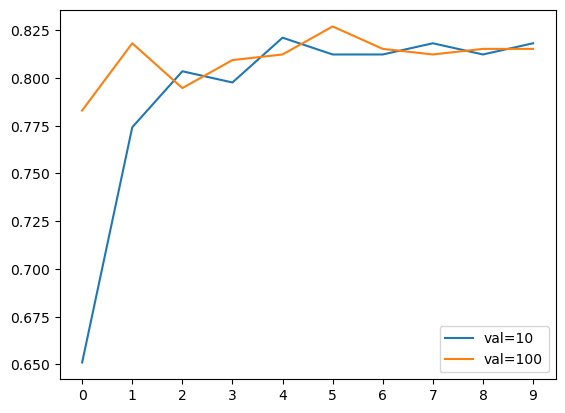

In [32]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

# Regularization and Dropout

In [28]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable = False # Don't change the convolution layers

    ####################################################################### CREATE ARCHITECTURE
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)


    outputs = keras.layers.Dense(10)(drop) # To make a prediction 

    model = keras.Model(inputs, outputs)
    ####################################################################### END OF ARCHITIECTURE
    
    # To know the best weights we need to use loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

    # to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [25]:
scores = {}
learning_rate=0.001
size = 100

for droprate in [0, 0.5]:
    print(size)

    model = make_model(learning_rate=learning_rate,size_inner=size,
        droprate=droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

100
Epoch 1/10
96/96 [==============================] - 62s 625ms/step - loss: 0.9808 - accuracy: 0.6744 - val_loss: 0.6546 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 56s 587ms/step - loss: 0.5076 - accuracy: 0.8230 - val_loss: 0.6104 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 56s 577ms/step - loss: 0.3534 - accuracy: 0.8840 - val_loss: 0.6256 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 58s 603ms/step - loss: 0.2670 - accuracy: 0.9133 - val_loss: 0.5912 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 57s 597ms/step - loss: 0.1821 - accuracy: 0.9531 - val_loss: 0.5705 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 58s 607ms/step - loss: 0.1278 - accuracy: 0.9723 - val_loss: 0.5688 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 61s 633ms/step - loss: 0.0957 - accuracy: 0.9821 - val_loss: 0.6253 - val_accuracy: 0.

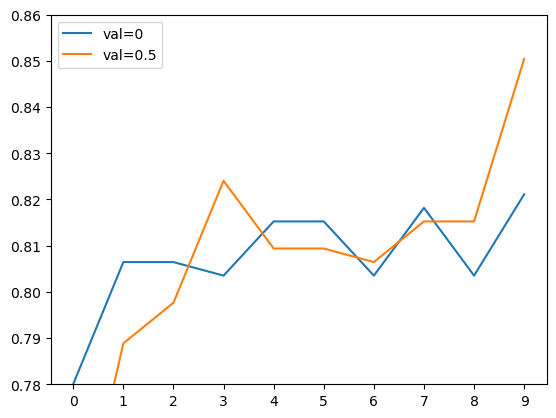

In [26]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.xticks(np.arange(10))
plt.legend()

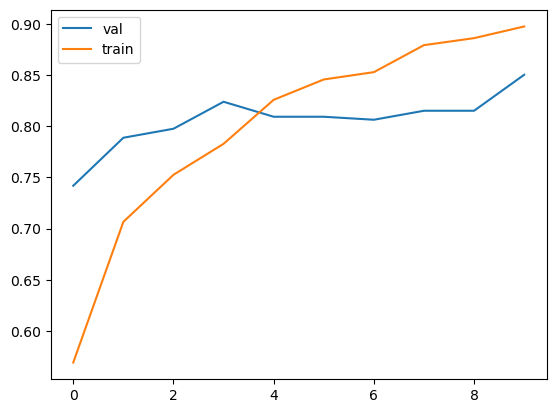

In [31]:
hist = scores[0.50]
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()

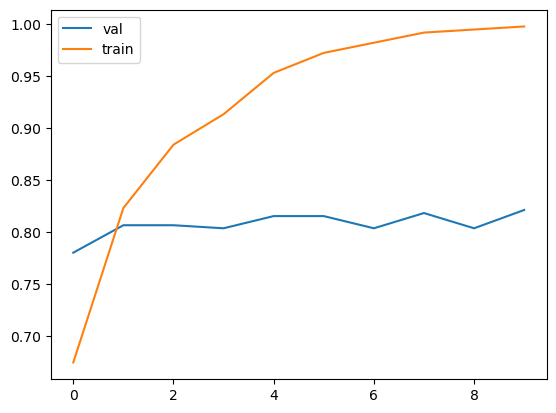

In [32]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()

# Data Augmentation

## Implement Manually

In [24]:
def apply_transform(x, transform_parameters):
    x = tf.keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),
        transform_parameters.get('shear', 0),
        transform_parameters.get('zx', 1),
        transform_parameters.get('zy', 1),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        order=1
    )

    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]

    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]

    return x

In [25]:
def augment(img, 
            rotation=0,
            height_shift=0,
            width_shift=0,
            shear=0,
            zoom_x=1,
            zoom_y=1,
            flip_horizontal=0,
            flip_vertical=0):

    x = np.array(img)

    transform_parameters = {
        'theta': rotation,
        'tx': height_shift,
        'ty': width_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }
    
    xaug = apply_transform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [26]:
def show_augmentations(param, values, figsize=(20, 6)):
    imgs = []

    for v in values:
        im = augment(tshirt, **{param: v})
        imgs.append(im)

    plt.figure(figsize=figsize)

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' % (param, values[i]))
        plt.axis("off")

    plt.show()    

C:\Users\Frags\AppData\Local\Temp\ipykernel_3548\778657932.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  tshirt = tshirt.resize((150, 150), resample=Image.NEAREST)


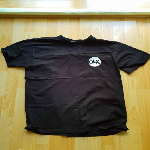

In [27]:
tshirt = Image.open('./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg')
tshirt = tshirt.resize((150, 150), resample=Image.NEAREST)
tshirt

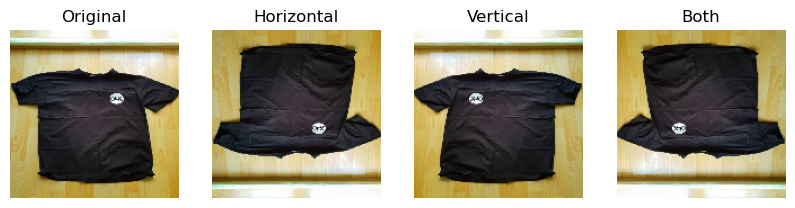

In [30]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(np.array(tshirt))
plt.title('Original')
plt.axis("off")


plt.subplot(1, 4, 2)

img = augment(tshirt, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")


plt.subplot(1, 4, 3)

img = augment(tshirt, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")


plt.subplot(1, 4, 4)

img = augment(tshirt, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show() 

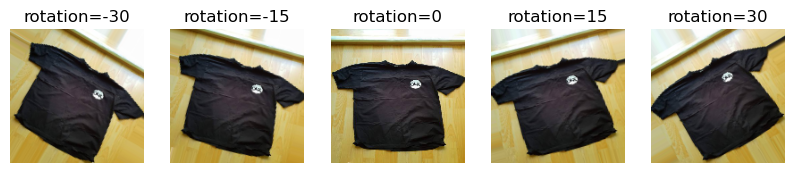

In [31]:
param = 'rotation'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

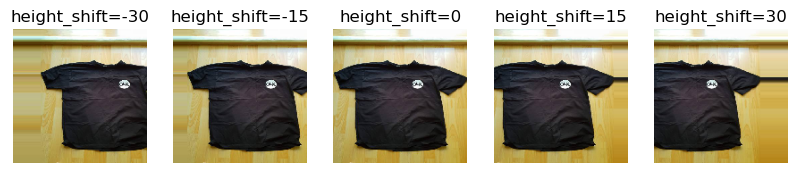

In [32]:
param = 'height_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

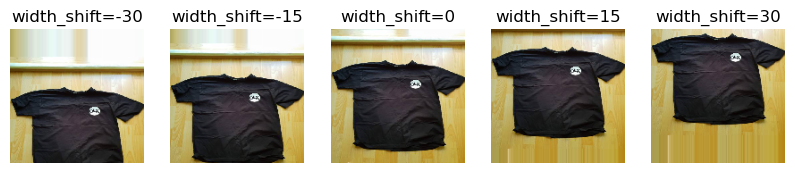

In [33]:
param = 'width_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

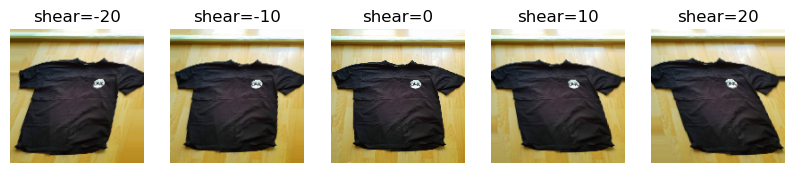

In [34]:
param = 'shear'
values = [-20, -10, 0, 10, 20]
show_augmentations(param, values, (10, 3))

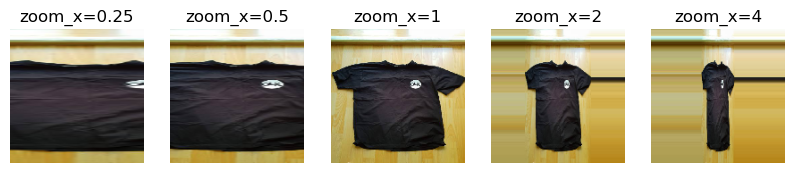

In [35]:
param = 'zoom_x'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

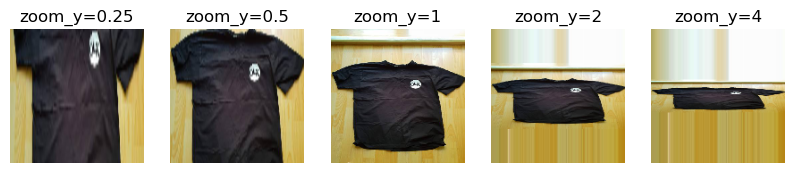

In [36]:
param = 'zoom_y'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

We don't need to implement manually, we can use ImageDataGenerator for that

In [37]:
vis_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=5.0,
    height_shift_range=5.0,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

In [38]:
x = np.array(tshirt)

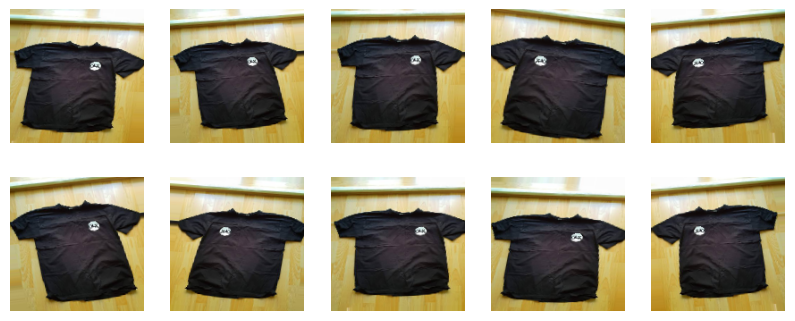

In [39]:
plt.figure(figsize=(10, 4))

for i in range(10):
    t = vis_gen.get_random_transform((150, 150))
    xaug = vis_gen.apply_transform(x, t)

    plt.subplot(2, 5, i + 1)
    plt.imshow(xaug.astype('uint8'))
    plt.axis("off")

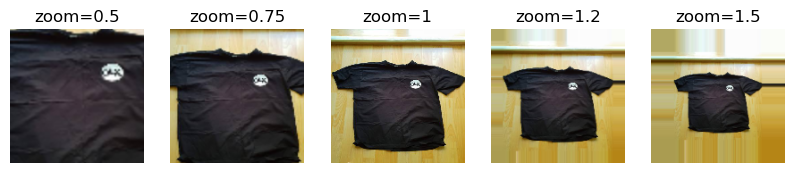

In [40]:
values = [0.5, 0.75, 1, 1.2, 1.5]

imgs = []

for v in values:
    im = augment(tshirt, zoom_y=v, zoom_x=v)
    imgs.append(im)

plt.figure(figsize=(10, 3))

n = len(values)

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(imgs[i]))
    plt.title('%s=%s' % ('zoom', values[i]))
    plt.axis("off")

plt.show()

## Implement Automatically

In [24]:
image_size = (150, 150)
batch_size = 32

In [25]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)


Found 341 images belonging to 10 classes.


In [26]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,  
)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [29]:
learning_rate=0.001
size = 100
droprate = 0.2
model = make_model(learning_rate=learning_rate, droprate=droprate, size_inner=size)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(train_ds, epochs=5, validation_data=val_ds, callbacks=callbacks)

Epoch 1/5
96/96 [==============================] - 75s 765ms/step - loss: 1.1444 - accuracy: 0.6291 - val_loss: 0.7128 - val_accuracy: 0.7742
Epoch 2/5
96/96 [==============================] - 65s 672ms/step - loss: 0.7345 - accuracy: 0.7474 - val_loss: 0.5985 - val_accuracy: 0.8035
Epoch 3/5
96/96 [==============================] - 56s 583ms/step - loss: 0.6017 - accuracy: 0.7878 - val_loss: 0.5734 - val_accuracy: 0.8065
Epoch 4/5
96/96 [==============================] - 63s 658ms/step - loss: 0.5303 - accuracy: 0.8096 - val_loss: 0.5736 - val_accuracy: 0.8152
Epoch 5/5
96/96 [==============================] - 57s 593ms/step - loss: 0.4779 - accuracy: 0.8338 - val_loss: 0.5447 - val_accuracy: 0.8240


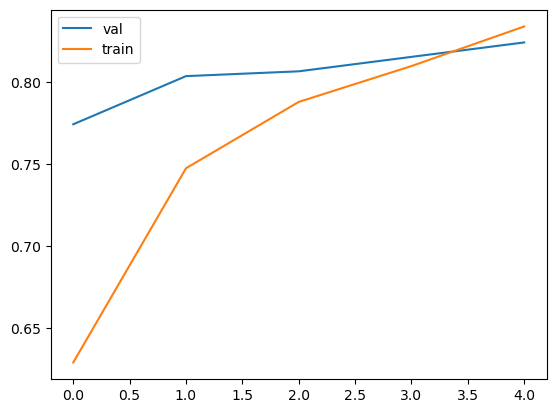

In [30]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# Training a Larger Model

In [31]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size,input_size,3)
    )

    base_model.trainable = False # Don't change the convolution layers

    ####################################################################### CREATE ARCHITECTURE
    inputs = keras.Input(shape=(input_size,input_size,3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)


    outputs = keras.layers.Dense(10)(drop) # To make a prediction 

    model = keras.Model(inputs, outputs)
    ####################################################################### END OF ARCHITIECTURE
    
    # To know the best weights we need to use loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

    # to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [35]:
image_size = (299, 299)
batch_size = 32

In [36]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,  
)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.
Found 3068 images belonging to 10 classes.


In [37]:
learning_rate=0.001
size = 100
droprate = 0.2
input_size = 299
model = make_model(input_size=input_size, learning_rate=learning_rate, droprate=droprate, size_inner=size)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(train_ds, epochs=5, validation_data=val_ds, callbacks=callbacks)

Epoch 1/5
96/96 [==============================] - 246s 3s/step - loss: 0.8281 - accuracy: 0.7278 - val_loss: 0.4847 - val_accuracy: 0.8328
Epoch 2/5
96/96 [==============================] - 234s 2s/step - loss: 0.4714 - accuracy: 0.8299 - val_loss: 0.3875 - val_accuracy: 0.8651
Epoch 3/5
96/96 [==============================] - 217s 2s/step - loss: 0.3961 - accuracy: 0.8618 - val_loss: 0.3888 - val_accuracy: 0.8622
Epoch 4/5
96/96 [==============================] - 213s 2s/step - loss: 0.3297 - accuracy: 0.8833 - val_loss: 0.3942 - val_accuracy: 0.8563
Epoch 5/5
96/96 [==============================] - 212s 2s/step - loss: 0.3154 - accuracy: 0.8869 - val_loss: 0.4093 - val_accuracy: 0.8563


# Using the Model

In [43]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [44]:
model = keras.models.load_model('xception_v4_02_0.865.h5')

In [45]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [46]:
model.evaluate(test_ds)

12/12 [==============================] - 26s 2s/step - loss: 0.3100 - accuracy: 0.8952


[0.3100162148475647, 0.8951612710952759]

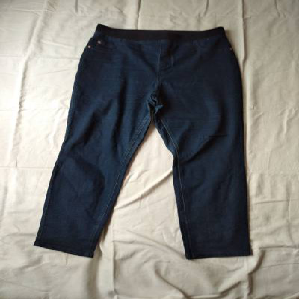

In [47]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

In [48]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [49]:
pred = model.predict(X)
pred[0]

1/1 [==============================] - 1s 615ms/step


array([-1.6995782 , -4.8844166 ,  0.08281504, -1.5069658 ,  7.4327974 ,
       -0.97510463, -2.5183153 ,  3.534897  , -2.6325767 , -1.7130593 ],
      dtype=float32)

In [51]:
classes=[
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [52]:
dict(zip(classes, pred[0]))

{'dress': -1.6995782,
 'hat': -4.8844166,
 'longsleeve': 0.08281504,
 'outwear': -1.5069658,
 'pants': 7.4327974,
 'shirt': -0.97510463,
 'shoes': -2.5183153,
 'shorts': 3.534897,
 'skirt': -2.6325767,
 't-shirt': -1.7130593}